In [6]:
# To import my python files with code.
import importlib

import data
import parameters
import imports
import figures

# To reload the pyhton files that are implemented.
importlib.reload(imports)
importlib.reload(parameters)
importlib.reload(data)
importlib.reload(figures)

from imports import (np, sp, solve, Symbol, re, im, Matrix, symbols, Eq, plt, Line2D, Axes3D, solve_ivp, scipy, interact, tqdm)
from parameters import get_parameters
from data import (get_vectors, get_solutions, show_solutions, get_time_array, get_groups, compute_jacobian_and_stability, get_Z_maxima, lorenz_chaos, get_Z_maxima)
from figures import (plot_bifuractions, plot_eigvals_vs_rho, show_3Dfigure_plot,show_3Dfigure_scatter,show_2D_bif_figs, plot_xyz_func_of_t, 
show_4_func_of_t_figs, show_diff_rho_vals, show_stability_of_equilibrium, three_3D_bifurcation_figures,plot_equilibria_all_parameters_3D, plot_ZvY, plot_ZvY_wings,
plot_XYZ_3D, plot_Z_time_with_maxima, plot_Zn_vs_Znplus1, plot_sensitivity_to_initial_conditions, show_butterfly_effect, show_lorenz_return_cobweb, show_bifurcation_diagram, show_bifurcation_diagram_log)

# 2 The Lorenz equations - Atmospheric Convection

The three ODE's known as the Lorenz equations are:
\begin{cases}
X' &= \sigma (Y - X) \\
Y' &= X(\rho - Z) - Y \\
Z' &= XY - \beta Z
\end{cases}
$X$,$Y$ and $Z$ are a function of the time.

We can assume that the variables $\sigma,\rho$ and $\beta$ are positive.

In [2]:
# ------General parameters-----  
sigma, beta, t_min, t_max, dt, initial_condition, initial_conditions = get_parameters()

## 2.1 Equilibria and Stability for $\rho<1$ <a id="section-2.1"></a>

In this section we will check the behavior of the system if $\mathbf{\rho < 1}$.\
We will determ the equilibria with the Jacobean and show them in a 3D plot.

The definition for the general jacobian is:
$$
J_f(x)
= \frac{\partial (f_1, \dots, f_m)}{\partial (x_1, \dots, x_n)}
= \begin{pmatrix}
\dfrac{\partial f_1}{\partial x_1} & \dfrac{\partial f_1}{\partial x_2} & \cdots & \dfrac{\partial f_1}{\partial x_n} \\
\dfrac{\partial f_2}{\partial x_1} & \dfrac{\partial f_2}{\partial x_2} & \cdots & \dfrac{\partial f_2}{\partial x_n} \\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{\partial f_m}{\partial x_1} & \dfrac{\partial f_m}{\partial x_2} & \cdots & \dfrac{\partial f_m}{\partial x_n}
\end{pmatrix}.
$$
Source: https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant

Here we will check the behavior of the system if $\rho < 1$.\
We will determ the equilibria with the Jacobean and show them in a 3D plot.

The Jacobean should look like this:

$$
J(X,Y,Z)
= \frac{\partial (X',Y',Z')}{\partial (X,Y,Z)}
= \begin{pmatrix}
\frac{\partial X'}{\partial X} & \frac{\partial X'}{\partial Y} & \frac{\partial X'}{\partial Z} \\
\frac{\partial Y'}{\partial X} & \frac{\partial Y'}{\partial Y} & \frac{\partial Y'}{\partial Z} \\
\frac{\partial Z'}{\partial X} & \frac{\partial Z'}{\partial Y} & \frac{\partial Z'}{\partial Z}
\end{pmatrix}
=
\begin{pmatrix}
-\sigma & \sigma & 0 \\
\rho - Z & -1 & -X \\
Y & X & -\beta
\end{pmatrix}.
$$


Computing the number of equilibria for different values of $\rho$.

In [ ]:
if __name__ == "__main__":
    show_solutions()

Solution 1:
 X = 0 Y = 0 Z = 0 

Solution 2:
 X = -sqrt(beta*rho - beta) Y = -sqrt(beta*(rho - 1)) Z = rho - 1 

Solution 3:
 X = sqrt(beta*rho - beta) Y = sqrt(beta*(rho - 1)) Z = rho - 1 



From ```get_solutions()``` we can see that de solutions are:

**Solution 1:**  
$$
\begin{cases}
x &= 0 \\
y &= 0 \\
z &= 0
\end{cases}
$$

**Solution 2:**  
$$
\begin{cases}
x = -\sqrt{\beta \rho - \beta}\\
y = -\sqrt{\beta(\rho - 1)}\\
z = \rho - 1
\end{cases}
$$

**Solution 3:**  
$$
\begin{cases}
x = \sqrt{\beta \rho - \beta}\\
y = \sqrt{\beta(\rho - 1)}\\
z = \rho - 1
\end{cases}
$$


For $\rho < 1$ we can see that $X$ value in **solution 2 and 3**: $-\sqrt{\beta \rho - \beta} \quad \forall \rho < 1$ is not real  and that the $Y$ value on **solution 2 and 3**: $\pm \sqrt{\beta(\rho - 1)}  \quad \forall \rho < 1$ also is not real. Note that the results does not change if $\rho$ is positive or not. So the only possible equilibrium for $\rho < 1$ is **solution 1**: 
$$
\begin{cases}
x &= 0 \\
y &= 0 \\
z &= 0
\end{cases}
$$

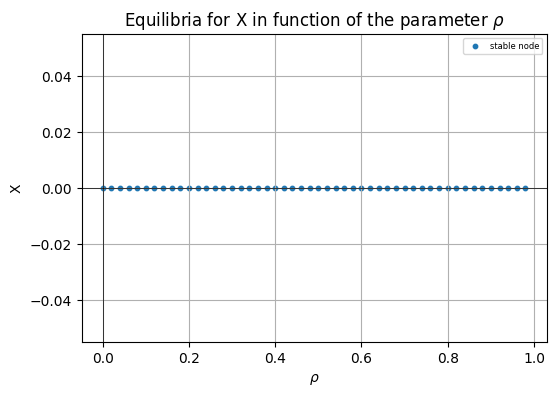

In [3]:
if __name__ == "__main__":
    sols, (x, y, z) = get_solutions() 
    result = compute_jacobian_and_stability(sols, x, y, z,small_rho=True)
    plot_bifuractions(result,component='X',only_small_rho=True, show_figure=True)

If we determ the eigenvalues of the jacobian, we get al three negative eigenvalues for $\rho \in [0.1,0.5,0.9]$. This means that we are dealing with an asymptotically stable equilibrium or in other words a sink. So the number of equilibria in this case is one. To better understand the meaning of the eigenvalues for $\rho \in [0,1]$ we can make a plot.

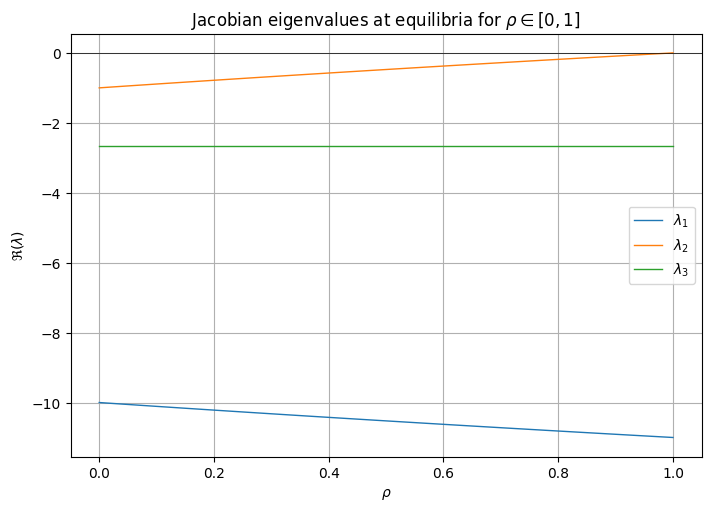

In [4]:
if __name__ == "__main__":
    plot_eigvals_vs_rho(small_rho=True, part="real", title=r'Jacobian eigenvalues at equilibria for $\rho \in [0,1]$')

We can see that al eigenvalues are negative, this means that for every value of $\rho$ in the interval [0,1[ is stable. At $\rho=1$ there is one eigenvalue that is zero, this wil be explained in section [2.2](#sec-2.2-bifurcation).

The purpose for the next figure is to investigate how fast the trajectories for $\rho<1$ and different initial conditions converge to the equilibruim, not to show the stable or unstable equilibria yet.

In [6]:
if __name__ == "__main__":
    interact(show_3Dfigure_scatter,rho=[0.1, 0.5, 0.9], small_rho=True)   

interactive(children=(Dropdown(description='rho', index=1, options=(0.1, 0.5, 0.9), value=0.5), Checkbox(value…

The scatter shows us that the coordinates of the initial conditions converge very fast towarts zero. Its also clear that the different values of $\rho<1$ have not a great effect on the trajectories. The only really visable difference are the bleu scatter points.

In [7]:
if __name__ == "__main__":
    interact(show_3Dfigure_plot, rho=(0,1,0.1), small_rho=True, continuous_update=False)

interactive(children=(FloatSlider(value=0.5, description='rho', max=1.0), Checkbox(value=True, description='sm…

We can see that if $\rho$ is varied from 0 to 1, that the 3D graph does not change much. We need to look very closely to effectively see the changes.

## 2.2 Bifurcation if $\rho$ passes 1 <a id="sec-2.2-bifurcation"></a>

In the previous question you determined the equilibria of the Lorenz system and analysed their stability for $\rho<1$. We now treat $\rho$ as a bifurcation parameter and investigate what happens when it crosses the critical value $\rho=1$. In particular, we want to identify the type of bifurcation that occurs by following how the eigenvalues of the linearised system change.

In [8]:
if __name__ == "__main__":
    interact(show_3Dfigure_plot, rho=(1,150,0.25), small_rho=False, continuous_update=False)

interactive(children=(FloatSlider(value=1.0, description='rho', max=150.0, min=1.0, step=0.25), Checkbox(value…

Now we also know that solution 2 and 3 from before are also a solution for $\rho$ in this Lorenz system.

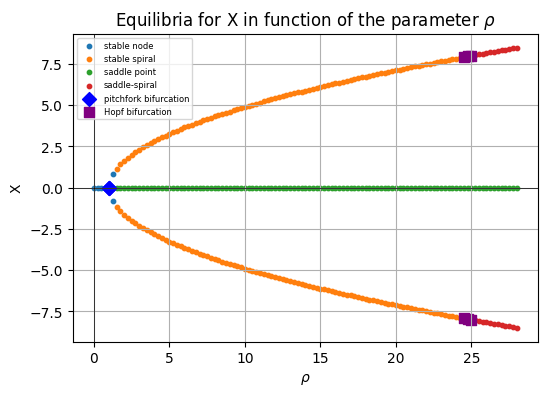

In [5]:
if __name__ == "__main__":
    plt.close('all')
    sols, (x, y, z) = get_solutions() 
    results = compute_jacobian_and_stability(sols, x, y, z,small_rho=False)
    plot_bifuractions(results, component="X", only_small_rho=False, show_figure=True)

<a id="fig-eq_for_X(rho)"></a>
_Figure: Equilibria for X in function of the parameter $\rho$._


Here we can clearly see a pitchfork bifurcation, But first we will look at the eigenvalues. At $\rho=1$ there are two negative eigenvalue and the third one is zero. On the figure we can see that because of that eigenvalue that is zero, there is a bifurcation point in this system. For $\rho>1$ we have two negative eigenvalues and one positive. at those places we have a sadlenode. At $\rho \approx 24,75$ we can see two hopf-bifurcations. The hopf-bifuraction points are characterised by an imagionary eigenvalue.

<table>
  <tr><th>parameter range</th><th>real equilibria and stability</th></tr>
  <tr><td>$\rho < 1$</td><td>$E_0=(0,0,0)$, stable</td></tr>
  <tr><td>$\rho = 1$</td><td>$E_0=(0,0,0)$, one eigenvalue $=0$</td></tr>
  <tr><td>$\rho > 1$</td><td>$E_0$ unstable, $E_\pm$ stable</td></tr>
</table>

We will show in the figure below the trajectories specific for $\rho = 24,75$ to show the Hopf-bifurcation points.

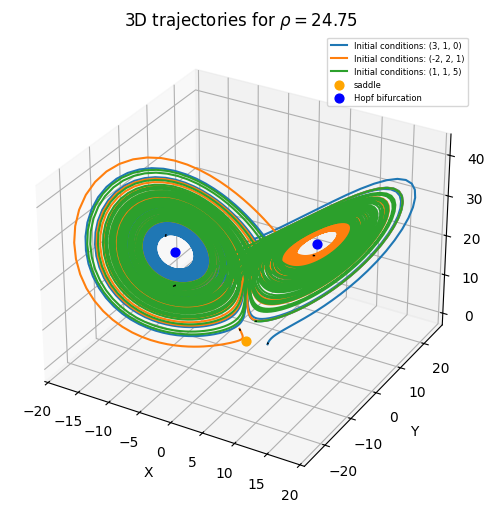

In [10]:
if __name__ == "__main__":
    show_3Dfigure_plot(rho=24.75,small_rho=False)

When $\rho \approx 24.75$ we can see the Hopf bifurcation points at the center of the Lorentzsystem's orbits.

## 2.3 Bifurcation Diagrams for the equilibria if $\rho$ goes up to 28

In the next step we extend the bifurcation analysis to a wider range of the control parameter. Rather than focusing on a single critical value of $\rho$, we now follow how the equilibria move and change stability as $\rho$ is increased up to 28. By plotting the equilibrium coordinates $(\rho,X)$, $(\rho,Y)$ and $(\rho,Z)$ and indicating whether each equilibrium is stable or unstable.

[Figure: Equilibria for X in function of the parameter $\rho$.](#fig-eq_for_X(rho)) from section [2.2](#sec-2.2-bifurcation) showed only the equilibria for $(\rho,X)$, we will repeat this proces, but also for $(\rho,Y)$ and $(\rho,Z)$ in function of $\rho \in [0,28]$.  

For each value of $\rho$ we:

1. Compute the equilibria $E_0$ and $E_\pm$.
2. Compute the Jacobian at those points and look at its eigenvalues.
3. Label each equilibrium as *stable*, *unstable* or *saddle*, based on those eigenvalues.

In the figures we plot the equilibrium coordinates
$(\rho, X_{\text{eq}})$, $(\rho, Y_{\text{eq}})$ and $(\rho, Z_{\text{eq}})$ with different markers.

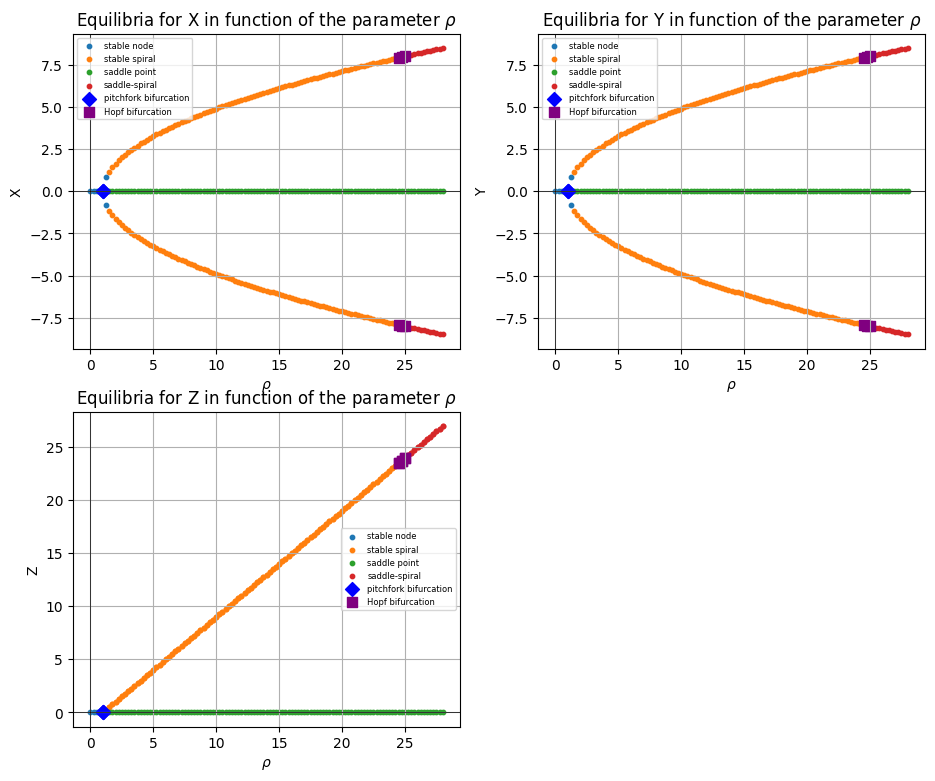

In [11]:
if __name__ == "__main__":
    sols, (x, y, z) = get_solutions() 
    results = compute_jacobian_and_stability(sols, x, y, z,small_rho=False)
    show_2D_bif_figs(results)

From these plots we can read the following behaviour:

- **For $0 \le \rho < 1$**  
  There is only one equilibrium, $E_0 = (0,0,0),$
  and it is stable: all eigenvalues of the Jacobian are negative. Every
  trajectory is attracted to the origin.

- **At $\rho = 1$: pitchfork bifurcation**  
  One eigenvalue at $E_0$ becomes zero, while the other two remain negative.
  At the same time two new equilibria $E_\pm$ appear. This is a **pitchfork
  bifurcation**: the single stable equilibrium at the origin splits into three
  equilibria which are discussed in section [2.1](#section-2.1)

- **For $1 < \rho < \rho_H \approx 24.74$**  
  The origin $E_0$ becomes a saddle (one positive and two negative eigenvalues),
  so trajectories are no longer attracted to it.  
  The two new equilibria $E_\pm$ are stable: they have one real negative
  eigenvalue and a complex conjugate pair with negative real part. Trajectories
  are now attracted to these two equilibria that are not at the center.

- **At $\rho = \rho_H$: Hopf bifurcation**  
  For $E_\pm$ the complex conjugate eigenvalues move through the **imaginary
  axis**: their real part changes from negative to positive. This is a
  **Hopf bifurcation** and marks the point where the system starts to develop
  oscillatory behaviour instead of converging to a fixed point.

- **For $\rho > \rho_H$**  
  All equilibria are unstable, and the trajectories are no longer attracted to any
  fixed point and instead approach the **chaotic Lorenz attractor**.

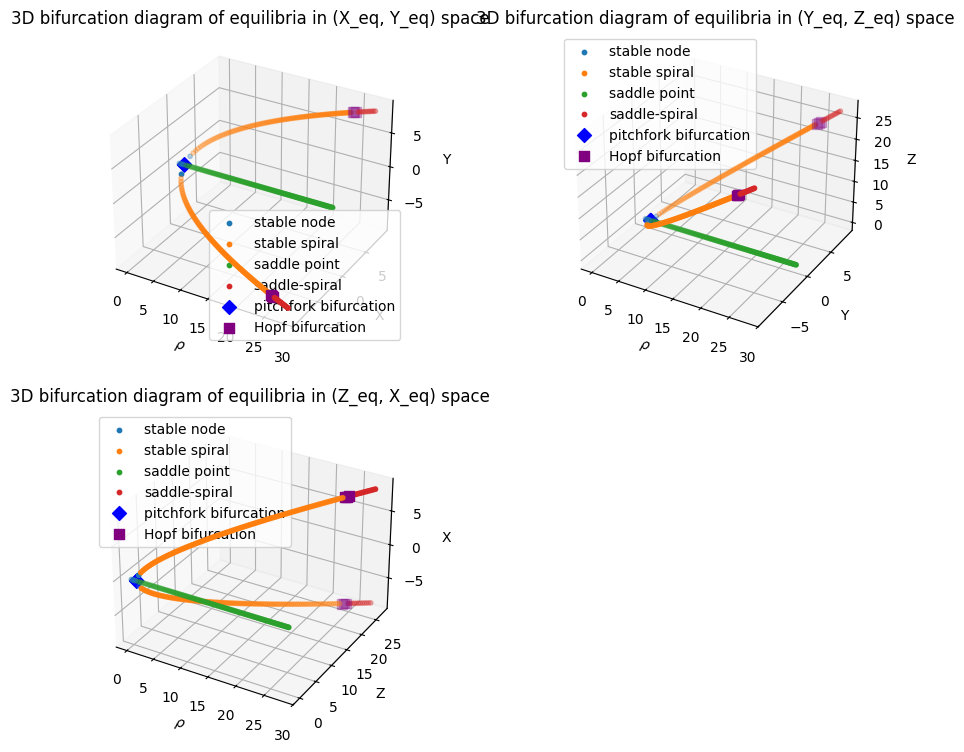

In [12]:
if __name__ == "__main__":
    sols, (x, y, z) = get_solutions() 
    results = compute_jacobian_and_stability(sols, x, y, z,small_rho=False)
    three_3D_bifurcation_figures(results)

The 3D bifurcation plots in $(\rho, X_{\mathrm{eq}}, Y_{\mathrm{eq}})$,
$(\rho, Y_{\mathrm{eq}}, Z_{\mathrm{eq}})$ and
$(\rho, Z_{\mathrm{eq}}, X_{\mathrm{eq}})$
provide a global view of the same structure and may give some better insights in the equilibria of the system. They confirm that no
additional equilibria or bifurcations appear in the considered parameter range $\rho \in [0,28]$.

## 2.4 Time-Series and Trajectories near $\rho \approx 24$ <a id="section-2.4"></a>

In this section we study how the Lorenz system behaves in time when the parameter
$\rho$ is taken around the value $\rho = 24.06$.  We plot the time series
$X(t)$, $Y(t)$ and $Z(t)$ for several values of $\rho$:  $\rho \in$ {$22.05$, $24.06$, $25$}.

To get an overall idea we first used an interactive plot where $\rho$ can be varied
in the interval $[1, 100]$.

In [13]:
if __name__ == "__main__":
    interact(show_4_func_of_t_figs,rho=(0.25, 100, 0.25), t_min=(0,250,1), t_max=(0,250,1), dt=(0.001,0.03,0.001), continuous_update=False)

interactive(children=(FloatSlider(value=24.0, description='rho', min=0.25, step=0.25), IntSlider(value=0, desc…

For small $\rho$ the solutions quickly converge to a
steady state: $X(t)$, $Y(t)$ and $Z(t)$ relax to constant values after a short
transient.  This is what we expect from the stability analysis of the
equilibria using the Jacobian matrix. 

In [ ]:
if __name__ == "__main__":
    interact(show_diff_rho_vals,t_min=(0,500,1), t_max=(0,500,1), dt=(0.001,0.05,0.001))

interactive(children=(IntSlider(value=0, description='t_min', max=500), IntSlider(value=50, description='t_max…

The more detailed plots for the three selected values of $\rho$ show the following:

1. **For $\rho = 22.05$**  
   The system shows damped oscillations around a stable equilibrium. The time series $X(t)$, $Y(t)$ and $Z(t)$ approach constant values after a transient, consistent with Jacobian eigenvalues with negative real parts (asymptotically stable equilibrium).  
   \
   $X(t), Y(t), Z(t)$ — **damped, stable oscillations**

2. **For $\rho = 24.06$**  
   The oscillations no longer decay to the equilibrium. The signals look almost periodic, but the peaks are not perfectly regular and the amplitudes and time intervals slowly change. This indicates the onset of more complex, almost chaotic behaviour, in line with the Hopf bifurcation found slightly above this value of $\rho$.  
   \
   $X(t), Y(t), Z(t)$ — **irregular, onset of chaotic behaviour**
   

3. **For $\rho = 25.0$**  
   The motion is fully chaotic. The trajectories do not converge to a fixed point but wander within a bounded region: the familiar Lorenz attractor. The time series are irregular and unpredictable.  
   \
   $X(t), Y(t), Z(t)$ — **chaotic, Lorenz attractor**
   



For $\rho = 24.06$ the long–time series $X(t)$, $Y(t)$ and $Z(t)$ (for $t$ up to about $100$ or more) show that the system is close to the edge of chaos: small changes in the initial condition lead to visibly different trajectories. This regime is often called **transient chaos**.



Finally, the **Lyapunov exponent** (further discussed in [Section 2.7](#sec-2.7)) can be used to quantify this sensitivity. A positive value indicates exponential divergence of nearby trajectories:
$$
\lambda = \lim_{t \to \infty} \frac{1}{t} \ln \left| \frac{X(t)}{X_0} \right|.
$$


**Summary of Behavior for Different $\rho$ Values:**

<table>
  <tr><th>Parameter range</th><th>Stability</th></tr>
  <tr><td>$\rho = 22.05$</td><td>Stable oscillations</td></tr>
  <tr><td>$\rho = 24.06$</td><td>Transient chaos</td></tr>
  <tr><td>$\rho = 25.0$</td><td>Fully developed chaos</td></tr>
</table>

To check that the equilibria labelled “stable” by the Jacobian analysis are also stable in the full nonlinear system, we performed an additional numerical test. For a parameter value in the stable regime, $\rho = 14.5$ (adjustable with the interactive widget), we first computed the corresponding equilibrium point $E$ from the symbolic solutions and Jacobian eigenvalues. We then integrated several trajectories with initial conditions of the form $E + \delta$, where $\delta$ is a small perturbation in different coordinate directions.

In [ ]:
if __name__ == "__main__":
    interact(show_stability_of_equilibrium, rho=(0,24.50,0.05),
             t_min=(0,200,1), t_max=(0,200,1), dt=(0.001,0.03,0.001),
            show_p1=True, show_p2=True, show_p3=True)

interactive(children=(FloatSlider(value=14.5, description='rho', max=24.5, step=0.05), IntSlider(value=0, desc…

The time series $X(t)$, $Y(t)$ and $Z(t)$ are plotted together with the corresponding equilibrium values as dashed horizontal lines. For small perturbations of the initial condition all three components relax back to the same constant values after a short transient. In other words, the distance $\|(X(t),Y(t),Z(t)) - E\|$ decays to zero, confirming that this equilibrium is asymptotically stable, in agreement with the eigenvalues of the Jacobian.


These time series confirm the stability classification of the equilibria from Sections 2.2 and 2.3. For parameter values where the Jacobian predicts a stable equilibrium (e.g. $\rho = 14.5$), nearby trajectories converge to that point. For values where the equilibria are unstable above the Hopf bifurcation, such as $\rho = 25$, trajectories are repelled and approach the chaotic attractor instead. By varying $\rho$ in the interactive plot, one can see this transition from a stable fixed point to chaotic dynamics.

## 2.5 Switching-Wings Dynamics at $\rho = 24.06$

In this section we focus on the value $\rho = 24.06$, where the Lorenz system is already in a chaotic regime. To analyse the motion we do not plot the full trajectory in configuration space, but we project it onto the $(Y,Z)$–plane and study $Z$ as a function of $Y$.

In [ ]:
if __name__ == "__main__":
    interact(plot_ZvY,rho=(0,35,0.02),
             t_min=(0.0, 500.0, 1.0), t_max=(0.0, 500.0, 1.0),
             dt=(0.001,0.1,0.001), continuous_update=False)

interactive(children=(FloatSlider(value=24.06, description='rho', max=35.0, step=0.02), FloatSlider(value=0.0,…

The figure above shows $Z(Y)$ for $t \in [0, 50]$, where we can change the time-interval with the interactive slider. The curve forms two spiral-shaped lobes, which correspond to the two “wings’’ of the Lorenz attractor. The trajectory winds for a while around one lobe, then jumps to the other lobe, and keeps repeating this behaviour.

The figure below shows the trajectory in 3D configuration space, which can give you a better visualisation of the system.

In [ ]:
if __name__ == "__main__":
    interact(plot_XYZ_3D, rho=(0,35,0.02),
                 t_min=(0.0, 500.0, 1.0), t_max=(0.0, 500.0, 1.0),
                 dt=(0.001,0.1,0.001), continuous_update=False)

interactive(children=(FloatSlider(value=24.06, description='rho', max=35.0, step=0.02), FloatSlider(value=0.0,…

To make the switching behaviour clearer,
the figure below colours the points according to the sign of $X$:

- points with $X(t) < 0$ are plotted in one colour as the left wing,
- points with $X(t) > 0$ are plotted in another colour as the right wing.


In [18]:
if __name__ == "__main__":
    interact(plot_ZvY_wings,rho=(0,35,0.02),
             t_min=(0.0, 500.0, 1.0), t_max=(0.0, 500.0, 1.0),
             dt=(0.001,0.01,0.001), continuous_update=False)

interactive(children=(FloatSlider(value=24.06, description='rho', max=35.0, step=0.02), FloatSlider(value=0.0,…

In this plot the two wings of the attractor appear as two separate clouds in the $(Y,Z)$–plane. Switches between wings show up as jumps from one coloured cloud to the other. The switching times are irregular: the trajectory may circle many times around one wing before suddenly jumping to the other, with no obvious repeating period. This is typical for chaotic dynamics.

Qualitatively, the behaviour at $\rho = 24.06$ can be summarised as follows:
- the motion is confined to two lobes in $(Y,Z)$,
- the trajectory spirals around one lobe, then unpredictably jumps to the other,
- the left/right sequence has no clear periodic pattern.

The plot also shows that the inner part of each wing is more densely filled with points than the outer part. This means that typical trajectories spend more time near the inner loops of each wing, while the outer regions are only visited during brief excursions. In dynamical-systems terms, the invariant density of the Lorenz attractor is higher in the inner parts of the wings and lower near the edges.

## 2.6 Return Map of Successive Maxima <a id="sec-2.6"></a>

In this part we investigate how the apparently irregular motion of the Lorenz system still contains an underlying deterministic structure. For the parameter value $\rho = 24.06$ the variable $Z(t)$ shows a sequence of well defined local maxima. We label these peaks as $Z_n$ in the order in which they occur in time, we can study how one maximum influences the next one.

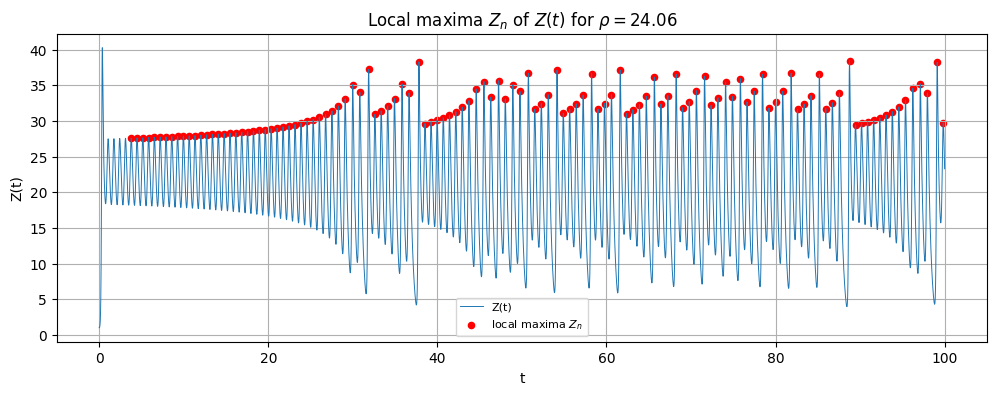

In [19]:
if __name__ == "__main__":
    plot_Z_time_with_maxima(t_max=100)

The figure above shows $Z(t)$ for $\rho = 24.06$ together with the detected local maxima marked in red. After discarding the first few peaks to remove the transient, the remaining sequence $Z_n$ still looks irregular: the heights fluctuate without any obvious periodicity, consistent with chaotic dynamics.


To test Lorenz’s idea that $\bf{Z_n}$ should predict $\bf{Z_{n+1}}$, we construct a **return map**: for each pair of consecutive maxima we plot the point
$(Z_n, Z_{n+1})$ in the plane. The result is shown in the figure below.

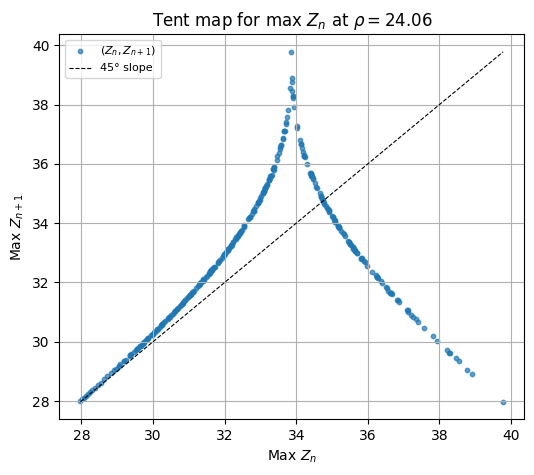

In [20]:
if __name__ == "__main__":
    plot_Zn_vs_Znplus1(skip_first=40, t_max=300,dt=0.01)

Despite the chaotic time signal, the return map does **not** fill the plane randomly. Instead, the points lie close to a one–dimensional curve with a “tent-like’’ shape. For a given value of $Z_n$ there is (up to a small thickness) a unique value of $Z_{n+1}$. In other words, the data are consistent with the existence of an approximately single–valued map
$$
Z_{n+1} = F(Z_n)
$$
for some nonlinear function $F$.

This figure can also found here: https://en.wikipedia.org/wiki/Lorenz_system at section: __Connection to the Tent map__.

This demonstrates that although the trajectory in $(X,Y,Z)$–space is chaotic, the sequence of maxima $Z_n$ is not random. Once $Z_n$ is known, $Z_{n+1}$ is essentially determined by the deterministic dynamics of the system. The return map in Figure 2 provides numerical evidence for this relationship and closely resembles the classical "Lorenz map" described in the literature.

## 2.7 Demonstrating Deterministic Chaos <a id="sec-2.7"></a>

In the previous parts we saw that the Lorenz system produces very complicated
trajectories, especially around $\rho = 24.06$. In this section we address a
natural question: is this irregular motion just random, or is it a signature
of deterministic chaos? We demonstrate in two independent ways that the system
is not random at all, but fully deterministic and chaotic.

#### 2.7.1 Return map of successive maxima

From Section [2.6](#sec-2.6) we extracted the local maxima $Z_n$ of the time series $Z(t)$
for $\rho = 24.06$ after discarding an initial transient. In the figure below we plot
each maximum $Z_n$ against the next one $Z_{n+1}$.

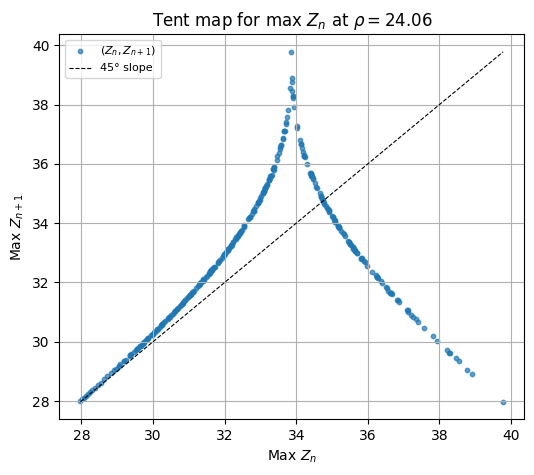

In [21]:
if __name__ == "__main__":
    plot_Zn_vs_Znplus1(skip_first=40, t_max=300,dt=0.01)

The points do not fill the plane in a random cloud. Instead, they lie close to
a one–dimensional tent–shaped curve. This shows that there is an underlying
deterministic rule
$$
Z_{n+1} \approx F(Z_n)
$$
that maps one peak to the next. The dynamics looks irregular in time, but the
sequence of maxima is strongly constrained: knowing $Z_n$ almost uniquely
determines $Z_{n+1}$. This is clear evidence that the system is not driven by
random noise, but evolves according to a deterministic map.

At the same time, the tent map is a classic example of a chaotic one–dimensional
system: small differences in $Z_n$ are stretched and folded by the tent-shaped
graph, which is exactly the geometric mechanism behind chaos.

#### 2.7.2 Sensitivity to initial conditions

As a second and independent test we investigate sensitivity to initial
conditions. We start two trajectories with almost identical initial states:
one at $X(0) = x_0$, and a second one at $X(0) = x_0 + \delta$ with
$\delta = 10^{-6}$, while $Y(0)$ and $Z(0)$ are the same. For $\rho = 24.06$
we integrate both trajectories and compute at each time $t$ their Euclidean
distance
$$
d(t) = \sqrt{(X_1(t)-X_2(t))^2 + (Y_1(t)-Y_2(t))^2 + (Z_1(t)-Z_2(t))^2 }.
$$

In [22]:
if __name__ == "__main__":
    interact(plot_sensitivity_to_initial_conditions, rho=(0,30,0.01),
         t_min=(0,500,1), t_max=(0,1000,1), dt=(0.001,0.01,0.001),
         delta=(1e-7, 1e-4, 1e-7))

interactive(children=(FloatSlider(value=24.06, description='rho', max=30.0, step=0.01), IntSlider(value=0, des…

The upper panel of the figure above shows the distance $d(t)$ on a linear scale. Initially the two
trajectories stay very close together, so $d(t)$ remains extremely small. After
some time the distance suddenly starts to grow and eventually becomes of order
one: the two solutions end up on completely different parts of the attractor
even though their initial conditions differed by only $10^{-6}$.

In the panel beneath (labelled with *semilogy*<sup>1</sup> ) we plot $d(t)$ on a logarithmic scale.
Over a certain time
interval the graph is approximately lineair, which corresponds to an
exponential growth:
$$
d(t) \sim e^{\lambda t}
$$
with $\lambda > 0$. This behaviour is characteristic of a positive [Lyapunov
exponent](https://en.wikipedia.org/wiki/Lyapunov_exponent) and is one of the defining features of chaos. 


<span style="font-size: smaller;">
    <sup>1</sup> <em>semilogy</em> in the title indicates the same plot as above, but with a logarithmic y-axis instead of a linear one.
</span>

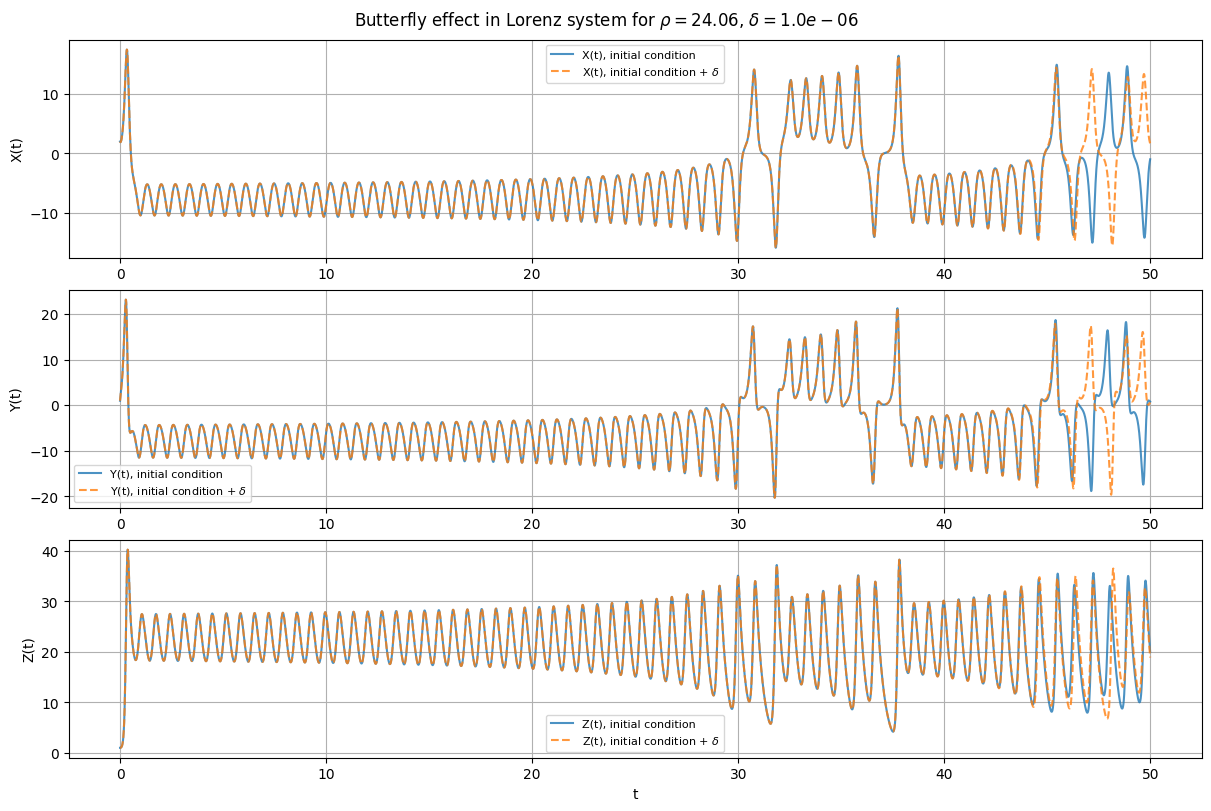

In [23]:
if __name__ == "__main__":
    show_butterfly_effect()                 

On the figure above you can see that indeed the trajects stay quite the same for some time, but suddenly they deviate from each other at a very fast rate, and then they follow a whole other path. 

#### Conclusion

The return map $Z_{n+1}$ versus $Z_n$ shows that the Lorenz system at
$\rho = 24.06$ is governed by a deterministic rule rather than random noise.
The rapid, approximately exponential separation of nearby trajectories
demonstrates strong sensitivity to initial conditions. Together these two
observations clearly indicate that the system is not random, but genuinely
chaotic.

## 2.8 Fixed Points in the Return Map

In section [2.6](#sec-2.6) we constructed a return plot that relates each local maximum $Z_n$ of $Z(t)$ to the next one $Z_{n+1}$. This plot not only visualises the chaotic structure of the dynamics, it also highlights special points where consecutive maxima coincide.

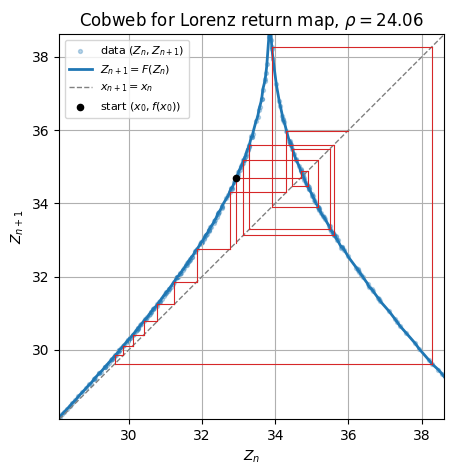

In [24]:
if __name__ == "__main__":
    t = get_time_array(t_min=t_min, t_max=300, dt=dt)
    x, y, z = get_vectors()
    t_max, Z_max = get_Z_maxima(rho=24.06, skip_first=50, t_min=t_min, t_max=300, dt=dt)

    show_lorenz_return_cobweb( Z_n=Z_max, n_iter=20, skip_first=50)

**Cobweb plot**

We study the 1D return map for the local maxima of $Z(t)$,
$$
Z_{n+1} = F(Z_n).
$$

A **fixed point** satisfies
$$
Z^* = F(Z^*),
$$
i.e. the graph of $F$ crosses the diagonal $Z_{n+1} = Z_n$.  [source](https://www.youtube.com/watch?v=P4tjxOFnGNo)
If $Z_0 = Z^*$, then
$$
Z_1 = Z_2 = Z_3 = \cdots = Z^*,
$$
so all maxima of $Z(t)$ have the same height. In the continuous-time system this corresponds to a periodic orbit whose maxima repeat every cycle (period 1 in the return map).

The cobweb plot shows that orbits starting near such a fixed point move away from it. This means that the slope of $F$ at $Z^*$ is large:
$$
|F'(Z^*)| > 1 \quad \Rightarrow \quad \text{fixed point unstable}.
$$

More generally, a period-$p$ orbit is a fixed point of $F^{(p)}$, and its stability is determined by
$$
\left|\left(F^{(p)}\right)'(Z_0)\right|
= \prod_{k=0}^{p-1} |F'(Z_k)|.
$$
Since $|F'(Z)| > 1$ on the attractor, this product is also $> 1$, so **all periodic orbits are unstable**.

**Conclusion.**  
The cobweb plot shows that neither fixed points nor periodic orbits are stable. The Lorenz return map is dynamically unstable and exhibits chaotic behaviour. The unstable periodic orbits act as part of the “skeleton’’ of the Lorenz attractor around which the chaotic trajectories wander.


## 2.9 Extra for the interested reader: The Bifurcation Diagram 

In [ ]:
if __name__ == "__main__":
    show_bifurcation_diagram_log()

It can be seen that the stable state at the origin bifurcates into twoo steady states at $\rho=1$, which is the pitchfork bifurcation from earlier. At $\rho \approx 24.737$ the two steady states undergo Hopf bifurcation, where a fixed point becomes a saddel point that leads to the onset of chaos. For $\rho<24.74$, the system exhibits steady states or periodic orbits, while for $\rho ≥ 24.74$, chaos emerges, revealing a fractal structure. If you look closely at the two values that approaching $\rho = 24.06$, they approach at the x values $\approx \pm 7.83$. This can also be seen in the first figure from section [2.4](#section-2.4), which confirm this figure of the bifurcation diagram.

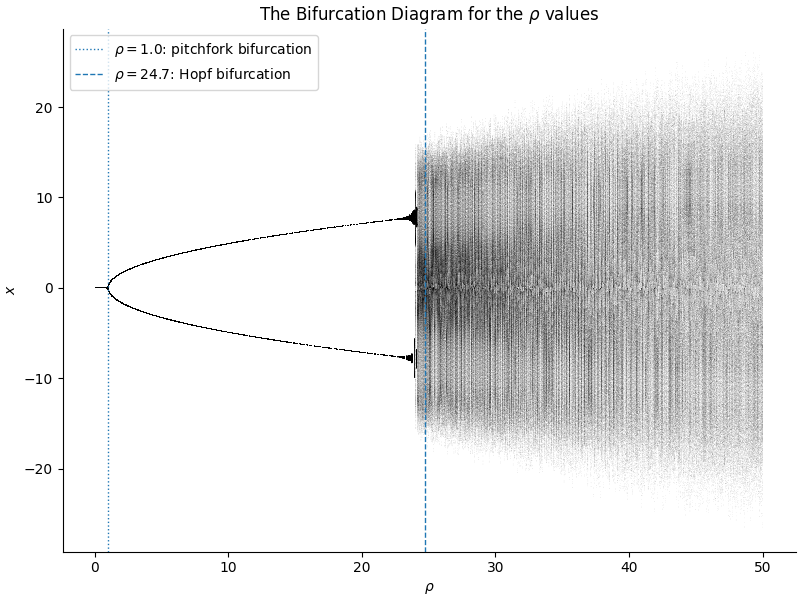

In [ ]:
if __name__ == "__main__":
    show_bifurcation_diagram()

This code runs very long, This is the code gives:

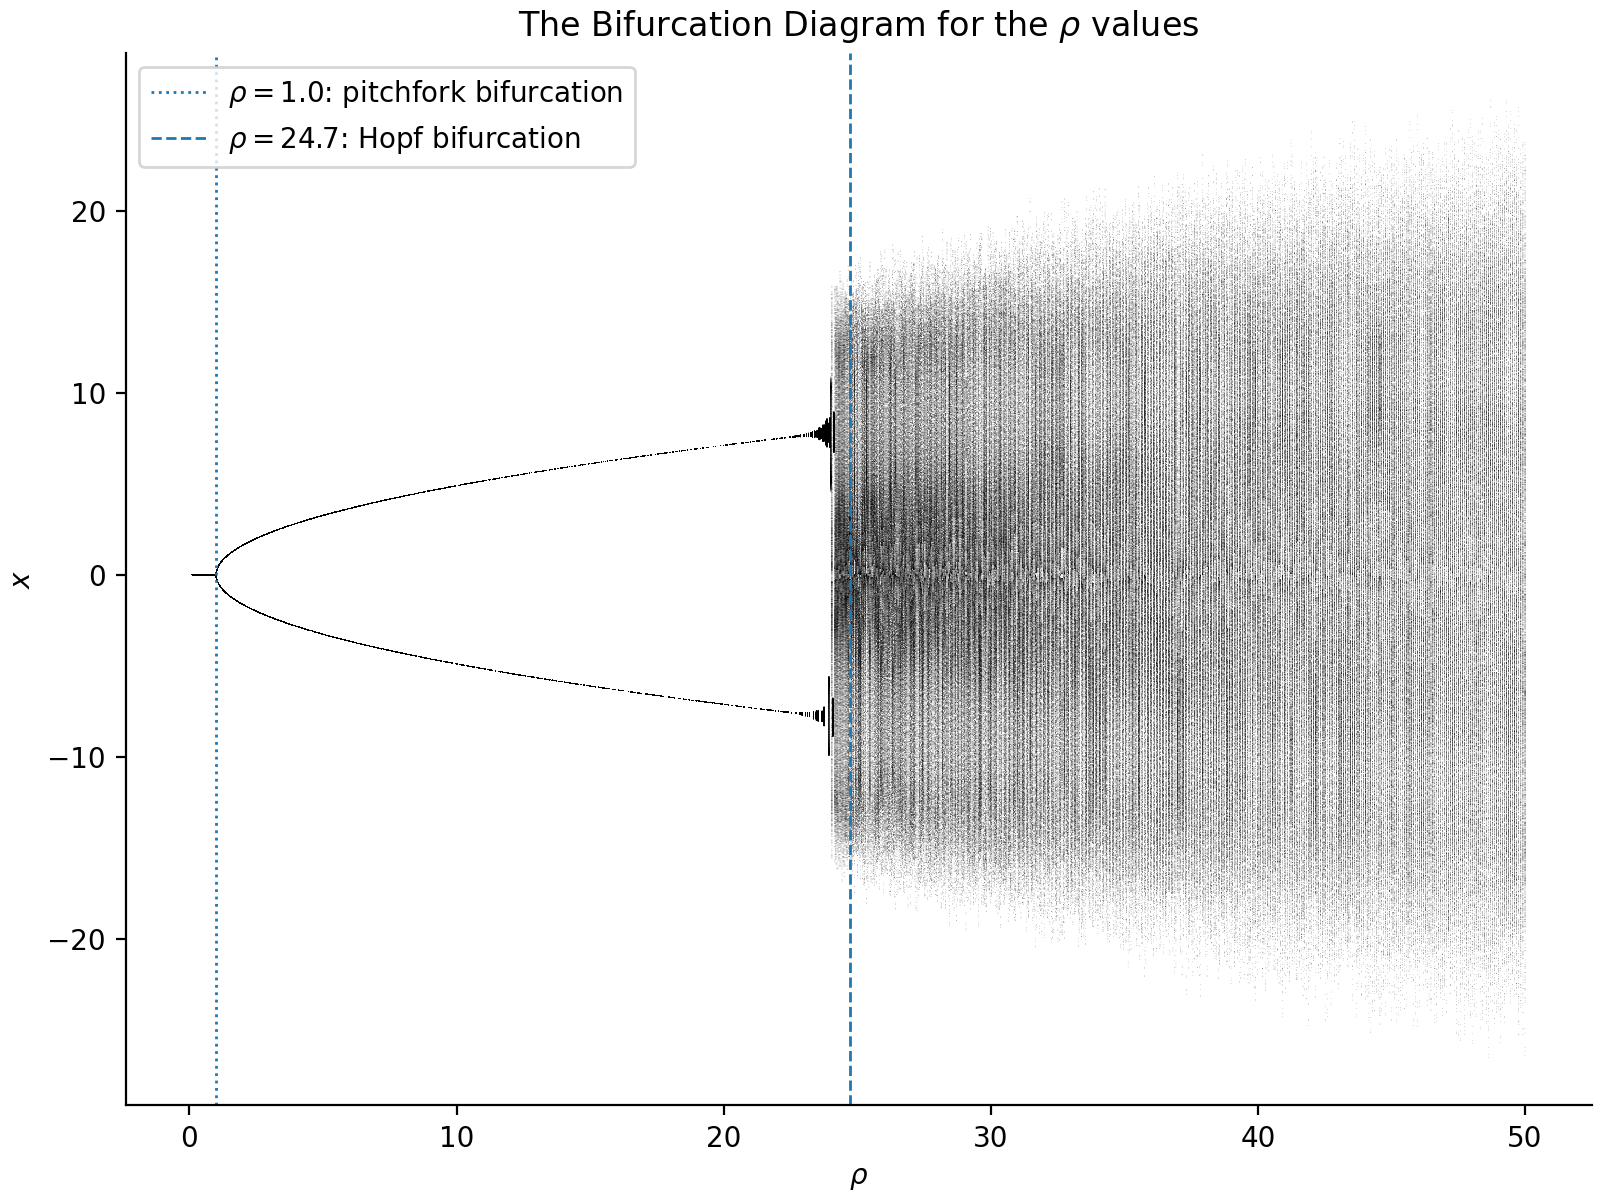

The figure shows a numerical bifurcation diagram of the Lorenz system as a function of the control parameter $\rho$. For each value of $\rho$ on the horizontal axis, the long–time values of the $x$–coordinate are plotted on the vertical axis.

For $\rho < 1$ the trajectory converges to the trivial equilibrium at $x = 0$. At $\rho = 1$ (dotted blue line) this equilibrium loses stability in a pitchfork bifurcation and two symmetric non-zero equilibria appear. This is visible as the smooth upper and lower branches for $1 < \rho < 24.7$: all points collapse onto these curves because the equilibria are stable and attract the trajectories.

At $\rho \approx 24.7$ (dashed blue line) a Hopf bifurcation occurs: the non-trivial equilibria lose stability and a chaotic attractor is born. Beyond this value, the points no longer lie on thin curves but fill a broad, fuzzy band in $x$, symmetric around zero. The dense black region for $\rho \gtrsim 25$ corresponds to the chaotic Lorenz attractor: the motion remains bounded but visits many different $x$–values in an irregular, aperiodic way.

In summary, the diagram clearly shows the transition from a single stable equilibrium, via a pitchfork bifurcation, to two stable equilibria, and finally to fully developed chaos after the Hopf bifurcation.
